In [60]:
import collections
import dataclasses

import networkx as nx
import pandas as pd
import seaborn as sns

from scripture_graph import graph_lib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
graph = nx.read_graphml('../../scripture_graph.graphml')

In [34]:
rows = []
# NOTE(kearnes): We are only considering "in" references.
for node, degree in graph.in_degree():
    row = {'node': node, 'degree': degree}
    row.update(graph.nodes[node])
    rows.append(row)
df = pd.DataFrame(rows)
print(df.shape)
df.head()

(41995, 6)


,node,degree,volume,book,chapter,verse
0,1 Chr. 1:1,0,Old Testament,1 Chr.,1,1
1,1 Chr. 1:2,0,Old Testament,1 Chr.,1,2
2,1 Chr. 1:3,0,Old Testament,1 Chr.,1,3
3,1 Chr. 1:4,2,Old Testament,1 Chr.,1,4
4,1 Chr. 1:5,0,Old Testament,1 Chr.,1,5


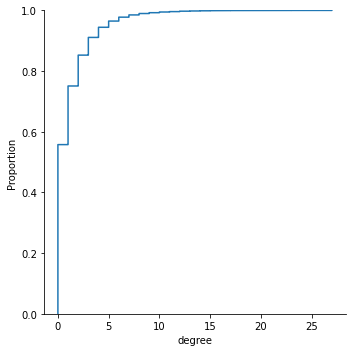

In [28]:
sns.displot(data=df, x='degree', kind='ecdf')

In [30]:
df.sort_values('degree', ascending=False).head(10)

,node,degree
36839,D&C 17:1,27
35494,D&C 1:38,27
31384,1 Ne. 17:35,25
39664,Hel. 12:3,25
35470,D&C 1:14,24
41051,Moses 6:57,23
32109,2 Ne. 25:20,23
31439,1 Ne. 19:10,23
38772,D&C 88:63,21
35472,D&C 1:16,21


In [10]:
# Look at pairs of standard works (or even books). What are the cross-reference patterns?

# TODO:
# * Compare to normalization by the number of verses (relative reference propensity). The absolute is interesting too.

In [43]:
volume_counts = collections.defaultdict(int)
book_counts = collections.defaultdict(int)
for tail in graph.nodes:
    tail_volume = graph.nodes[tail]['volume']
    tail_book = graph.nodes[tail]['book']
    for head, _ in graph.in_edges(tail):
        head_volume = graph.nodes[head]['volume']
        head_book = graph.nodes[head]['book']
        volume_counts[(head_volume, tail_volume)] += 1
        book_counts[(head_book, tail_book)] += 1

rows = []
for (head, tail), count in volume_counts.items():
    rows.append({'head': head, 'tail': tail, 'count': count})
volume_data = pd.DataFrame(rows)
print(volume_data.head())
        
rows = []
for (head, tail), count in book_counts.items():
    rows.append({'head': head, 'tail': tail, 'count': count})
book_data = pd.DataFrame(rows)
print(book_data.head())

                     head           tail  count
0           Old Testament  Old Testament  11244
1    Pearl of Great Price  Old Testament    369
2          Book of Mormon  Old Testament   2435
3  Doctrine and Covenants  Old Testament   1840
4           New Testament  Old Testament   1098
     head    tail  count
0    Gen.  1 Chr.     31
1   Moses  1 Chr.      3
2   Ether  1 Chr.      2
3    Abr.  1 Chr.      1
4  1 Sam.  1 Chr.     19


<AxesSubplot:xlabel='head', ylabel='tail'>

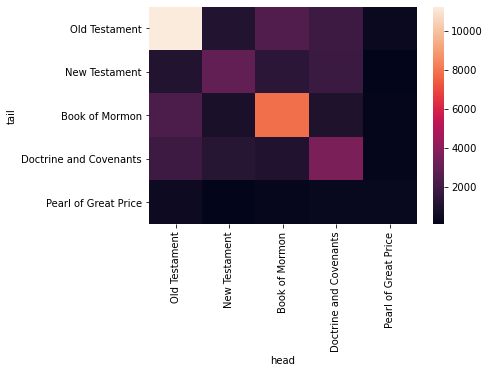

In [58]:
order = []
for volume in graph_lib.VOLUMES.keys():
    if volume == 'Study Helps':
        continue
    order.append(volume)
df = volume_data.pivot('tail', 'head', 'count').reindex(index=order, columns=order)
sns.heatmap(df)

<AxesSubplot:xlabel='head', ylabel='tail'>

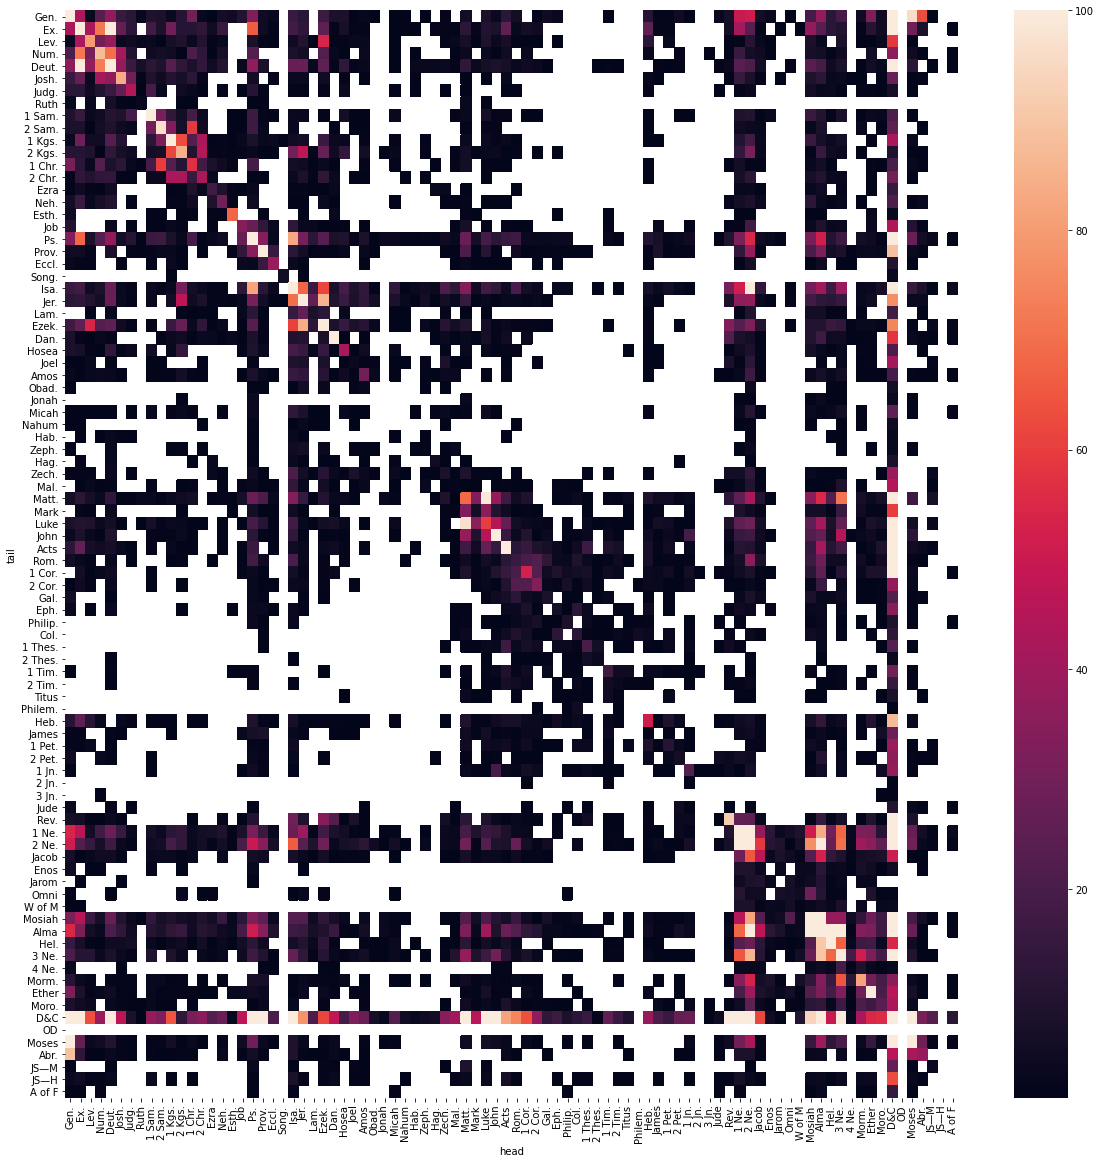

In [64]:
order = []
for volume, books in graph_lib.VOLUMES.items():
    if volume == 'Study Helps':
        continue
    order.extend(books)
df = book_data.pivot('tail', 'head', 'count').reindex(index=order, columns=order)
figure(figsize=(20, 20))
sns.heatmap(df, vmax=100)